In [1]:
import math
import os
import sys
import argparse

import pandas as pd
import numpy as np

sys.path.append('../..')

from src.IO.IO import IO
from src.util import get_config

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,6)

In [2]:
# absolute path to the config folder
path = "../../src/config_files/"
cfg_filename = "config_lbds.yaml"
cfg_filename = "config_lbds_single_feature.yaml"
fn = path + '/' + cfg_filename
if os.path.exists(fn):
    cfg = get_config(fn)
else:
    print("Config file {} couldn't be found at {}, exiting".format(args.configfn, fn))
    exit()

Reading config file


In [3]:
import util

io = IO(cfg, 'pipeline')
ad = cfg["pipeline"]["anomaly_detection"]["anomaly_detector"]
machine = cfg["machine"]
nb_runs = 100
experiments = ['new_logbook (-12h,0)', 'new_logbook (-12h,+2h)']
filenames = ["grid_search_statistics_multiple_pipelines_lbds_2016_B2_100_iforest_res-practical_recall.csv", 
             "grid_search_statistics_multiple_pipelines_lbds_2016_B2_100_iforest_res-practical_recall-single_feature.csv"]

# get filenames
stats_path = io.grid_search_statistics_path
stats_path = io.get_multiple_pipeline_statistics_path(ad)
statistics_dfs = {}
#for e in experiments:
#    fn = "grid_search_statistics_multiple_pipelines_{}_{}_{}.csv".format(nb_runs, ad, e)
#    statistics_dfs[e + ' ({} runs)'.format(nb_runs)] = io.read_csv(fn, stats_path)
for i, fn in enumerate(filenames):
    statistics_dfs[experiments[i]] = io.read_csv(fn, stats_path)

Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_100_iforest_res-practical_recall.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_100_iforest_res-practical_recall-single_feature.csv file


Saving figure at /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../results/experiments/figures/iforest/2016/01-01/B1/


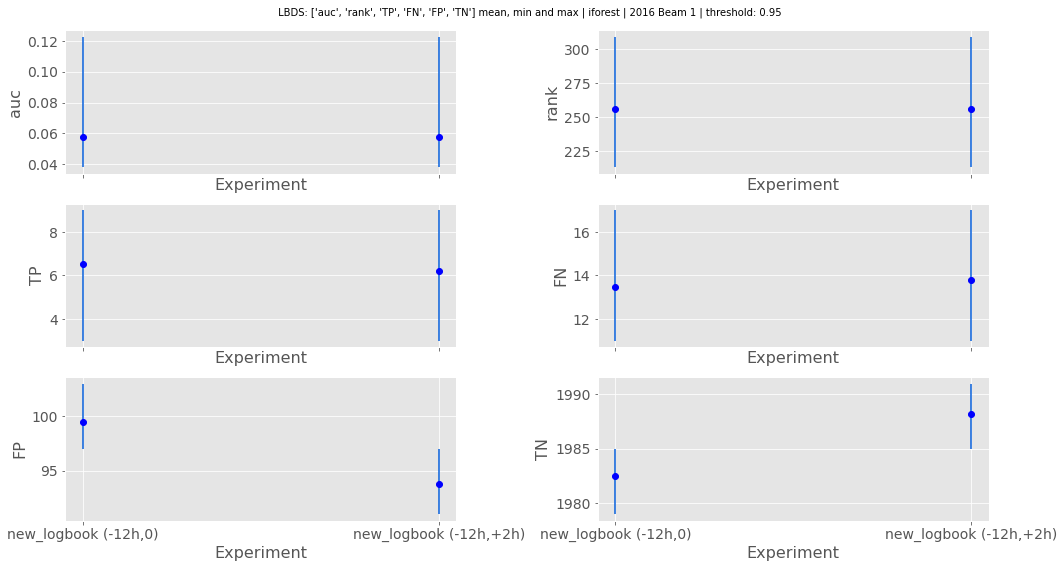

In [4]:
from plot.gs_statistics import plot_multi_pipeline_run_stats

dfs_to_plot = ['auc', 'rank', 'TP', 'FN', 'FP', 'TN']
fig = plot_multi_pipeline_run_stats(cfg, statistics_dfs, dfs_to_plot=dfs_to_plot)